script to train VBL-VA001

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

load data hasil ekstraksi fitur fft

In [19]:
import pandas as pd

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
x = pd.read_csv(path, header=None)

load label

In [20]:
import pandas as pd

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'
y = pd.read_csv(path, header=None)

make 1D array to avoid warning

In [21]:
y = pd.Series.ravel(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True)

In [23]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (15604, 27)
Shape of Test Data : (3901, 27)


kNN Machine Learning<br>
import KNeighborsClassifier<br>
Setup arrays to store training and test accuracies

In [24]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

KeyboardInterrupt: 

print max acccuracy

In [ ]:
print(f"Max test acc: {np.max(test_accuracy)}")

Max test acc: 0.9456549602665983


Generate plot<br>
plt.title('k-NN Varying number of neighbors')

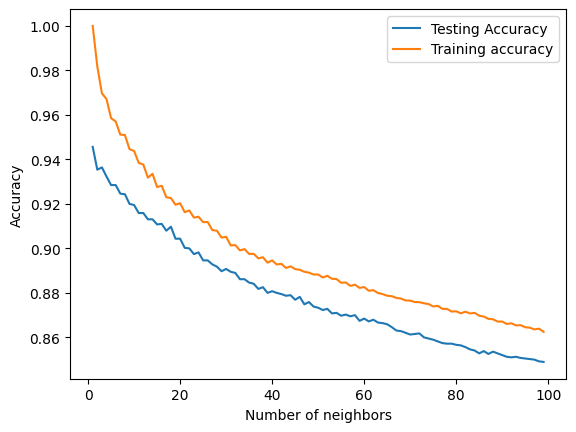

In [ ]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# np.savetxt('knn_n.txt', test_accuracy)
# plt.savefig('acc_knn.pdf')

print optimal k and max test accuracy

In [ ]:
print(f"Optimal k: {np.argmax(test_accuracy)}")
print(f"Max test accuracy: {max(test_accuracy)}")

Optimal k: 0
Max test accuracy: 0.9456549602665983


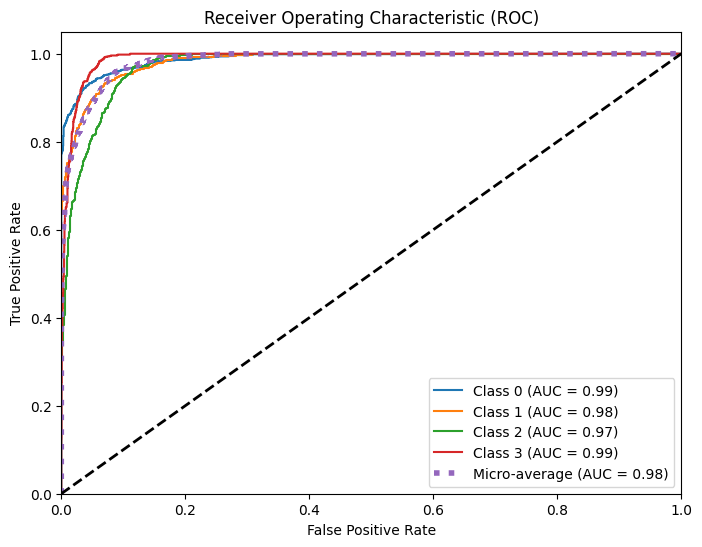

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Mengubah label menjadi format biner
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Menghitung skor jarak ke setiap kelas
distances, indices = knn.kneighbors(X_test)

# Mengubah jarak menjadi probabilitas dengan inverse distance weighting
inv_distances = 1 / distances
inv_distances /= np.sum(inv_distances, axis=1, keepdims=True)

# Menghitung probabilitas untuk setiap kelas
y_prob = np.zeros((len(y_test), len(np.unique(y))))
for i in range(len(y_test)):
    for j in range(len(indices[i])):
        y_prob[i, y_train[indices[i, j]]] += inv_distances[i, j]

# Menghitung kurva ROC dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Menghitung kurva ROC dan AUC untuk micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

# Menggambar kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Menghitung presisi (menggunakan metode macro)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Menghitung recall (menggunakan metode macro)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

# Menghitung F1-score (menggunakan metode macro)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ", f1)

Accuracy:  0.8490130735708793
Precision:  0.8607193516803429
Recall:  0.8504241008596276
F1-score:  0.8475598403794926
